In [1]:
%matplotlib inline
import random
import os
import json
import sys
import string
import unicodedata
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import itertools

In [2]:
#Given local path, find full path
def PathFinder(path):
    script_dir = os.path.dirname('__file__')
    fullpath = os.path.join(script_dir,path)
    return fullpath

#Read Data for Deep Learning
def ReadData(path):
    fullpath=PathFinder(path)
    return np.loadtxt(fullpath,delimiter=',')

def getScales(X,Y):
    distances = np.sqrt(np.power(X-5,2)+np.power(Y-5,2))
    scalefactor = 2.0/(1.0+np.exp(-2*distances))-0.99;
    return scalefactor

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl

def Virtualizing(Data,Fix):
    fig9 = plt.figure(figsize=(4, 4), dpi=100)
    ax9 = fig9.add_subplot(111)
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    
    delta = 0.05
    x = y = np.arange(0, 10.01, delta)
    X, Y = np.meshgrid(x, y)
    Z=getScales(X,Y)
    cp = plt.contour(X, Y, Z,extent=(0,10,0,10))
    plt.clabel(cp, inline=True, 
          fontsize=10)
    plt.scatter(0, 0, s=500, marker="o")
    plt.scatter(8, 8, color='orange', s=500, marker="*")
    Location_x=0;
    Location_y=0;
    plt.xlabel('X-AXIS')
    plt.ylabel('Y-AXIS')
    palette = itertools.cycle(sns.color_palette())
    color_tensorflow = next(palette)
    next(palette)
    color_fix = next(palette)
    plt.plot([0,0], [0,0], color=color_tensorflow,lw=1.5,label="Tensorflow")
    plt.plot([0,0], [0,0], color=color_fix,lw=1.5,label="FIXED")    
    legend = plt.legend(loc='lower right', shadow=True,prop={'size':10})
    ax9.yaxis.tick_right()
    for i in range(len(Data)):
        plt.plot([Location_x,Data[i,0]], [Location_y,Data[i,1]],color=color_tensorflow,lw=1.5)
        plt.plot([Location_x,Data[i,0]], [Location_y,Data[i,1]],color=color_tensorflow,marker='*',lw=1.5)
        Location_x=Data[i,0]
        Location_y=Data[i,1]
    
    Location_x=0;
    Location_y=0;
    for i in range(len(Fix)):
        plt.plot([Location_x,Fix[i,0]], [Location_y,Fix[i,1]], color=color_fix, lw=1.5)
        plt.plot([Location_x,Fix[i,0]], [Location_y,Fix[i,1]], color=color_fix, marker='*',lw=1.5)
        Location_x=Fix[i,0]
        Location_y=Fix[i,1]
    plt.savefig('Comparison.eps',format='eps')

In [4]:
data=ReadData('tensorflow_data.txt')
fix=ReadData('fix_record.txt')

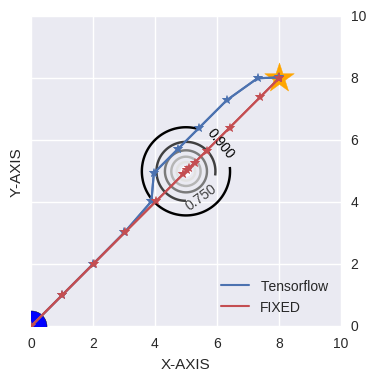

In [5]:
Virtualizing(data,fix)